#Importing Keras libraries

In [1]:
import keras

In [2]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 14.6 MB/s 


#Importing ImageDataGenerator from Keras

In [3]:
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

#Defining the Parameters

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)


#Applying ImageDataGenerator functionality to train dataset



In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/IBM PROJECT/dataset/DATA SET/archive/Dataset/Dataset/train_set',target_size=(64,64),batch_size=32,class_mode='binary')


Found 436 images belonging to 2 classes.


#Applying ImageDataGenerator functionality to test dataset

In [7]:
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/IBM PROJECT/dataset/DATA SET/archive/Dataset/Dataset/test_set',target_size=(64,64),batch_size=32,class_mode='binary')


Found 121 images belonging to 2 classes.


#Importing Model Building Libraries

In [8]:
#to define the linear Initialisation import sequential
from keras.models import Sequential
#to add layers import Dense
from keras.layers import Dense
#to create Convolutional kernel import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer 
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

#Initializing the model

In [9]:
model = Sequential()

#Adding CNN Layers

In [10]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
#add maxpooling layers
model.add(MaxPooling2D(pool_size=(2,2)))
#add faltten layer
model.add(Flatten())

#Add Dense layers

In [11]:
#add hidden layers
model.add(Dense(150,activation='relu'))
#add output layer
model.add(Dense(1,activation='sigmoid'))

#configuring the learning process

In [12]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

#Training the model

In [13]:
model.fit_generator(x_train,steps_per_epoch=14,epochs=10,validation_data=x_test,validation_steps=4)

Epoch 1/10
14/14 [==============================] - 137s 10s/step - loss: 0.9627 - accuracy: 0.7294 - val_loss: 0.3491 - val_accuracy: 0.8595
Epoch 2/10
14/14 [==============================] - 22s 2s/step - loss: 0.3139 - accuracy: 0.8532 - val_loss: 0.1041 - val_accuracy: 0.9752
Epoch 3/10
14/14 [==============================] - 20s 1s/step - loss: 0.2354 - accuracy: 0.9037 - val_loss: 0.1252 - val_accuracy: 0.9421
Epoch 4/10
14/14 [==============================] - 22s 2s/step - loss: 0.2281 - accuracy: 0.9106 - val_loss: 0.0831 - val_accuracy: 0.9752
Epoch 5/10
14/14 [==============================] - 20s 1s/step - loss: 0.1916 - accuracy: 0.9289 - val_loss: 0.0753 - val_accuracy: 0.9752
Epoch 6/10
14/14 [==============================] - 22s 2s/step - loss: 0.1879 - accuracy: 0.9128 - val_loss: 0.0738 - val_accuracy: 0.9669
Epoch 7/10
14/14 [==============================] - 20s 2s/step - loss: 0.1720 - accuracy: 0.9312 - val_loss: 0.0745 - val_accuracy: 0.9669
Epoch 8/10
14/14 [

#Save the model

In [14]:
model.save("forest.h5")

#Predictions

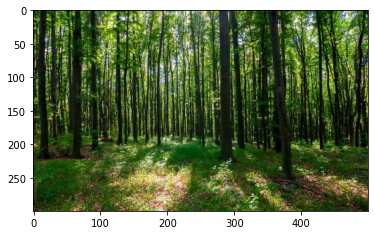

In [28]:
#import load model from keras.model
from keras.models import load_model
#import image from keras
from tensorflow.keras.preprocessing import image
import numpy as np
#import cv2
import cv2
#load the saved model
model=load_model("forest.h5")
img=image.load_img('/content/drive/MyDrive/IBM PROJECT/dataset/DATA SET/archive/Dataset/Dataset/test_set/forest/0.72918000_1559733279_forests1_gettyimages_.jpg')
plt.imshow(img)
plt.show()
x=image.img_to_array(img)
res=cv2.resize(x,dsize=(64,64),interpolation=cv2.INTER_CUBIC)
#expand the image shape
x=np.expand_dims(res,axis=0)

In [29]:
pred=model.predict(x)
pred = int(pred[0][0])
pred
int(pred)

1/1 [==============================] - 0s 58ms/step


1

In [30]:
if pred==0:
  print('Forest fire')
  from twilio.rest import Client
  print('Forest fire')
  account_sid='AC34c4bee5e03df7bc7dba1eef29761275'
  auth_token='1fc522239435d0c251c1fd870d715295'
  client=Client(account_sid,auth_token)
  message=client.messages \
  .create(
      body='forest fire is detected,stay alert',
      #use twilio free number
      from_='+19803934024',
      #to number
      to='+919962082226')
  print(message.sid)
  print("Fire detected")
  print("SMS Sent!")
elif pred==1:
  print('No Fire')


No Fire
